<a href="https://colab.research.google.com/github/m1njae/basic_python/blob/master/Opencv_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

opencv: 이미지를 처리하는 작업

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import cv2
import matplotlib.pyplot as plt

# OpenCV: [B, G, R] / Matplotlib: [R, G, B]
img_basic = cv2.imread('추석.jpg',cv2.IMREAD_COLOR)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_BGR2RGB))
plt.show()

img_basic = cv2.cvtColor(img_basic, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img_basic, cv2.COLOR_GRAY2RGB))
plt.show()

OpenCV 이미지 연산

In [ ]:
import cv2
image = cv2.imread('추석.jpg')

#픽셀 수 및 이미지 크기 확인
print(image.shape)
print(image.size)

#이미지 Numpy 객체의 특정 픽셀을 가리킴
px = image[100, 100]

# B, G, R 순서로 출력.
# (단, Gray Scale인 경우에는 B, G, R로 구분되지 않음)
print(px)

# R 값만 출력하기
print(px[2])

(1440, 1440, 3)
6220800
[173 221 255]
255


OpenCV를 활용한 특정 범위 픽셀 변경

In [ ]:
#1
import cv2
import matplotlib.pyplot as plt
import time

image = cv2.imread('추석.jpg')

start_time = time.time()
for i in range(0, 100):
  for j in range(0, 100):
    image[i,j] = [0, 0, 0]
print("--- %s seconds ---" % (time.time()- start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
#2 (1번보다 2번코드가 더 빠른 연산 실행)

import cv2
import matplotlib.pyplot as plt
import time

image = cv2.imread('추석.jpg')

start_time = time.time()
image[0:100, 0:100] =[0, 0, 0]
print("--- %s seconds ---" % (time.time()- start_time))

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

ROI(Region Of Interest) 추출 및 복사

유의미한 feature들을 추출할 때
그 유의미한 feature가 있는 공간을 interesting한 공간이라고 한다.

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('추석.jpg')

# Numpy Slicing : ROI 처리 가능
roi = image[750:1150, 400:1000]

# ROI 단위로 이미지 복사하기(slicing한 값과 동일하게)
image[0:400, 0:600] = roi

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


픽셀별로 색상 다루기

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('추석.jpg')
# image[행값, 열값, BGR의 인덱스]
image[:, :, 0] = 0

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

OpenCV 이미지 변형

이미지 크기 조절

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('추석.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(expand, cv2.COLOR_BGR2RGB))
plt.show()

shrink = cv2.resize(image, None, fx=0.8, fy=0.8, interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(shrink, cv2.COLOR_BGR2RGB))
plt.show()

이미지 위치 변경

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('추석.jpg')

# 행과 열 정보만 저장
height, width = image.shape[:2]

M = np.float32([[1, 0, 50],[0, 1, 10]])
dst = cv2.warpAffine(image, M,( width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

이미지 회전

In [ ]:
 import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('추석.jpg')

# 행과 열 정보만 저장
height, width = image.shape[:2]

M = cv2.getRotationMatrix2D((width / 2, height / 2), 90, 0.5)
print(M)
dst = cv2.warpAffine(image, M, (width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

이미지 합치기

길게 붙이는 게 아니라 이미지를 겹쳐서 합치기

In [ ]:
import cv2
import matplotlib.pyplot as plt

image_1 = cv2.imread("추석.jpg")
image_2 = cv2.imread("하늘.jpg")

print(image_1.shape)
print(image_2.shape)

#size가 동일해야 한다
result = cv2.add(image_1 , image_2)
plt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))
plt.show()


(1440, 1440, 3)
(212, 238, 3)


'\nresult = cv2.add(image_1, image_2)\nplt.imshow(cv2.cvtColor(result,cv2.COLOR_BGR2RGB))\nplt.show()\n'

임계점 처리

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("추석.jpg", cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()



이미지의 적응 임계점 처리

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving images.jpg to images.jpg


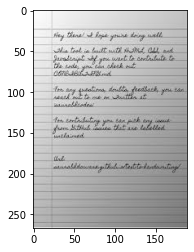

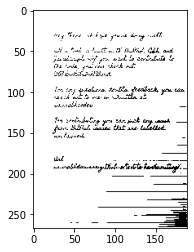

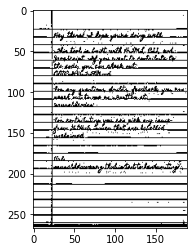

In [ ]:
import cv2

image = cv2.imread('images.jpg', cv2.IMREAD_GRAYSCALE)

ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
thres2= cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 21, 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB))
plt.show()

plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))
plt.show()

Tracker

Tracker는 사용자가 값을 편하게 바꿔볼 수 있는 기능

In [ ]:
import cv2
import numpy as np

def change_color(x):
    r = cv2.getTrackbarPos("R", "Image")    #트랙 바 값 설정 함수
    g = cv2.getTrackbarPos("G", 'Image')
    b = cv2.getTrackbarPos("B", "Image")
    image[:] = [b , g, r]
    cv2.imshow('Image', image)

image = np.zeros((600, 400, 3), np.uint8)
cv2.namedWindow("Image")

cv2.createTrackbar("R", "Image", 0, 255, change_color)
cv2.createTrackbar("G", "Image", 0, 255, change_color)
cv2.createTrackbar("B", "Image", 0, 255, change_color)

cv2.imshow('Image', image)
cv2.waitKey(0)

Opencv 도형 그리기

직선 그리기

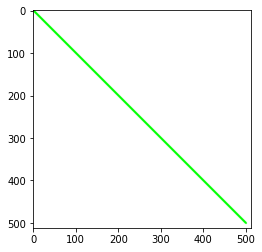

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.line(image, (0, 0), (500, 500), (0, 255, 0), 3)

plt.imshow(image)
plt.show()

In [ ]:
사각형 그리기

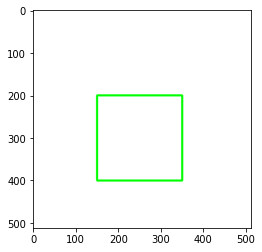

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.rectangle(image, (150, 200), (350, 400), (0, 255, 0), 3) # -1은 사각형 채우기

plt.imshow(image)
plt.show()

원 그리기

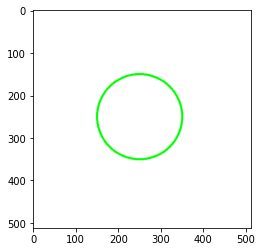

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
image = cv2.circle(image,(250, 250), 100, (0, 255, 0), 3) # -1은 사각형 채우기

plt.imshow(image)
plt.show()

다각형 그리기

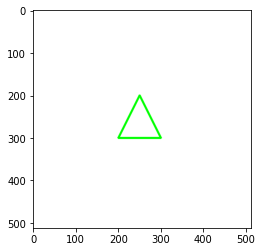

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
points = np.array([[250, 200], [200,300], [300,300]] )
image = cv2.polylines(image, [points], True, (0, 255, 0), 3) # -1은 사각형 채우기

plt.imshow(image)
plt.show()

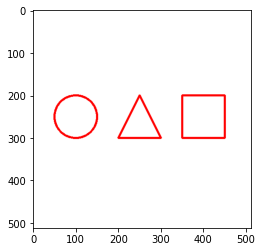

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)
points = np.array([[250, 200], [200,300], [300,300]] )

image = cv2.circle(image,(100, 250), 50, (255, 0, 0), 3)
image = cv2.polylines(image, [points], True, (255, 0, 0), 3) 
image = cv2.rectangle(image,(350, 200),(450, 300), (255, 0, 0), 3)

plt.imshow(image)
plt.show()

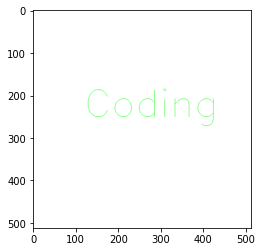

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = np.full((512, 512, 3), 255, np.uint8)

image = cv2.putText(image, 'Coding', (120, 250), cv2.FONT_ITALIC, 3,(0, 255, 0))


plt.imshow(image)
plt.show()

Contours(윤곽) 찾기

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 추석.jpg to 추석.jpg


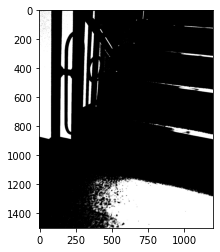

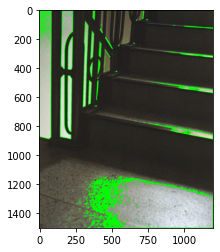

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('image2.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2. threshold(image_gray, 127, 255, 0)

plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_GRAY2RGB))
plt.show()

contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]  #findContours opencv 버전에 따라서 반환 값 개수가 다르다!
image = cv2.drawContours(image, contours, -1, (0, 255, 0), 4)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

OpenCV Filtering

필터링

1. 이미지에 커널을 적용하여 이미지를 흐리게 처리
2. 이미지를 흐리게 만들면 노이즈 및 손상을 줄임



Basic Blur

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("추석.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

dst = cv2.blur(image, (20, 20))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

Gaussian Blur

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("추석.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# kernel_size: 홀수
dst = cv2.GaussianBlur(image, (25, 25), 0)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()